# EJERCICIO 3

# Ensamblaje de Secuencias de ADN mediante Grafos de De Bruijn

En este ejercicio, se abordará el ensamblaje de secuencias de ADN utilizando grafos de De Bruijn a partir de fragmentos de secuenciación de próxima generación (NGS). A continuación, se presentan el desarrollo del problema, el código utilizado para la construcción y visualización del grafo, así como las respuestas a las preguntas adicionales.

## Datos del Ejercicio

1. El alfabeto de las bases del ADN es \{A, C, G, T\}.
2. Los fragmentos de ADN (lecturas) obtenidos son de longitud k = 4:
   - AGTC
   - GTCA
   - TCAG
   - CAGT
   - AGTT
   - GTTG

### Objetivo
1. **Construcción del Grafo de De Bruijn**: Dividir cada fragmento en un prefijo de longitud \(k-1=3\) y un sufijo de longitud \(k-1=3\), construir un grafo dirigido donde los nodos son estos prefijos y sufijos, y las aristas representan los fragmentos.
2. **Determinación de la Secuencia Original**: Reconstruir la secuencia original de ADN siguiendo un camino euleriano que recorra todas las aristas del grafo una sola vez.


## Paso 1: Construcción del Grafo de De Bruijn

Para construir el grafo de De Bruijn, dividimos cada fragmento de longitud \( k = 4 \) en prefijos y sufijos de longitud \( k-1 = 3 \). Esto permite que cada fragmento de ADN se represente como una arista en el grafo, conectando su prefijo y sufijo correspondientes. 

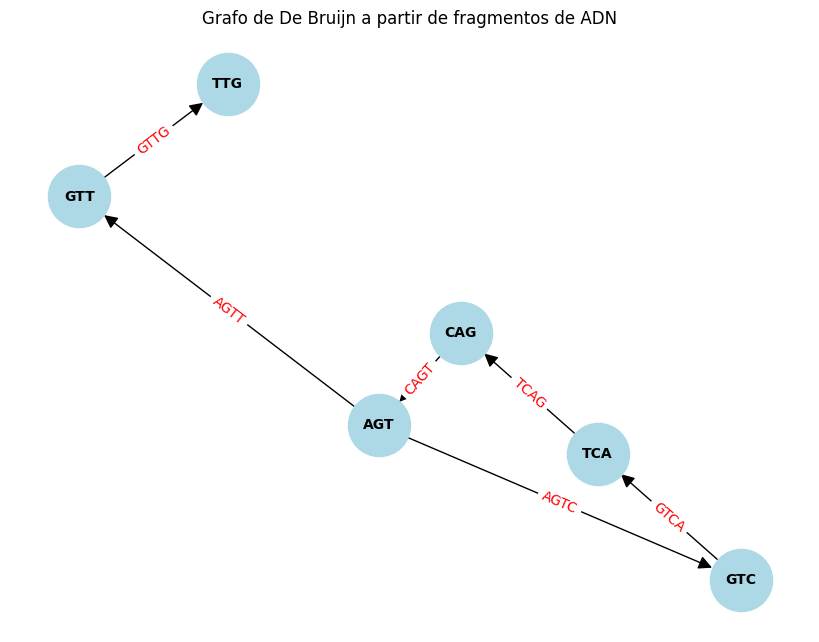

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

fragments = ["AGTC", "GTCA", "TCAG", "CAGT", "AGTT", "GTTG"]

de_bruijn_graph = nx.DiGraph()

# añadimos los nodos y las aristas al grafo
for fragment in fragments:
    prefix = fragment[:-1]  # prefijo de longitud k-1 (3)
    suffix = fragment[1:]   # sufijo de longitud k-1 (3)
    de_bruijn_graph.add_edge(prefix, suffix, label=fragment)

# Dibujado del grafo
pos = nx.spring_layout(de_bruijn_graph)
plt.figure(figsize=(8, 6))
nx.draw(de_bruijn_graph, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
edge_labels = nx.get_edge_attributes(de_bruijn_graph, 'label')
nx.draw_networkx_edge_labels(de_bruijn_graph, pos, edge_labels=edge_labels, font_color='red')
plt.title("Grafo de De Bruijn a partir de fragmentos de ADN")
plt.show()

Aqui vemos como cada nodo representa un prefijo o sufijo, y cada arista (etiquetada con el fragmento correspondiente) conecta los prefijos y sufijos, representando la relación de solapamiento entre los fragmentos de ADN.



# Paso 2: Encontrar el Camino Euleriano y Ensamblar la Secuencia

Un camino euleriano en este grafo permite recorrer cada arista una sola vez, ensamblando así la secuencia original de ADN.




In [6]:
eulerian_path = list(nx.eulerian_path(de_bruijn_graph)) # Camino euleriano en el grafo de De Bruijn

assembled_sequence = eulerian_path[0][0]  # Empezar con el primer nodo del camino
for u, v in eulerian_path:
    assembled_sequence += v[-1]  # Añadir la última letra de cada sufijo en el camino

print("Camino Euleriano:", eulerian_path)
print("Secuencia ensamblada de ADN:", assembled_sequence)


Camino Euleriano: [('AGT', 'GTC'), ('GTC', 'TCA'), ('TCA', 'CAG'), ('CAG', 'AGT'), ('AGT', 'GTT'), ('GTT', 'TTG')]
Secuencia ensamblada de ADN: AGTCAGTTG


La secuencia ensamblada final es el resultado de seguir el camino euleriano en el grafo, tomando cada sufijo de las aristas visitadas y agregándolas para formar la cadena de ADN reconstruida.



3) El grafo de De Bruijn permite representar cómo los fragmentos de ADN se solapan, ya que cada fragmento se convierte en una arista que conecta un prefijo y un sufijo. Las superposiciones entre cada fragmento se recorren una vez en el camino euleriano, la secuencia original puede reconstruirse uniendo estas superposiciones.

PREGUNTAS ADICIONALES

1) Si hay errores, aparecerían nodos y aristas adicionales, creando caminos alternativos que no forman un camino euleriano completo. Para estos manejar errores, podriamos utilizar algoritmos de corrección de errores o generar estadísticas de frecuencia para identificar errores como caminos poco frecuentes.

2) Las repeticiones crean múltiples caminos entre nodos, lo que dificulta encontrar un único camino euleriano. Esto se soluciona utilizando fragmentos más largos o métodos de corrección de repetición.

3) Los k-mers más largos reducen la ambigüedad, ya que proporcionan más contexto en cada fragmento, lo cual disminuye la cantidad de caminos repetitivos en el grafo y mejora la precisión del ensamblaje.